In [1]:
import pandas as pd
import numpy as np
import statistics as st

# Assuming you have the data in a CSV file
df =  pd.read_csv('C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course4-Numpy python/Sprint7//DS1_C4_S7_Students_Scores_Data_Practice.csv')

# Create a DataFrame
df = pd.DataFrame(df)

# Calculate mean, median, and mode for each subject
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]  # Assuming only one mode

# Print the results
print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMode:")
print(mode)
#Interpretation:in this students_scores_data python students got high score compare with statistics,Tableau students

Mean:
Statistics    60.89
Python        81.84
Tableau       68.02
dtype: float64

Median:
Statistics    60.0
Python        82.0
Tableau       69.0
dtype: float64

Mode:
Statistics    55
Python        86
Tableau       65
Name: 0, dtype: int64


In [3]:
#task2:
#Calculation for Standard deviation and coefficient of variation
Mean =[]
SD =[]
CV =[]
VAR =[]
for col in df:
  col_mean = df.loc[:,col].mean()
  Mean.append(col_mean)
  col_sd = df.loc[:,col].std()
  SD.append(col_sd)
  col_var=df.loc[:,col].var()
  VAR.append(col_var)
  CV.append(col_sd/col_mean*100)

row_head = ['Variance','Coefficient of Variation']
col_names =['Statistics','Python','Tableau']
d_data = pd.DataFrame([CV,VAR],columns = col_names)

d_data.insert(0,"Measures",row_head,True)
print(d_data)
#interpretation:Python appears to have the most consistent performance based on both variance and CV. 
#This suggests that the scores for Python are less spread out and more tightly clustered around the mean.Python would be considered the subject with the best performance based on the measures of variability.



                   Measures  Statistics     Python    Tableau
0                  Variance   11.883931   5.309731  10.762862
1  Coefficient of Variation   52.361515  18.883232  53.595556


In [13]:
import pandas as pd

def calculate_outliers(series):
  """Calculates outliers for a given series using the IQR method."""
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  LF = Q1 - 1.5 * IQR
  UF = Q3 + 1.5 * IQR
  LO = series[series < LF].tolist()
  UO = series[series > UF].tolist()
  return LO, UO

def analyze_subject(subject, df):
  """Analyzes a subject's data and returns a list of relevant statistics."""
  series = pd.Series(df[subject])
  Min = series.min()
  Max = series.max()
  Range = Max - Min
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  LF, UF = calculate_outliers(series)
  return [subject, Min, Max, Range, Q1, Q3, IQR, LF, UF, [LO, UO]]

subjects = ['Statistics', 'Python', 'Tableau']
results = [analyze_subject(subject, df) for subject in subjects]
col_names = ['student_scores', 'Min', 'Max', 'Range', 'Q1', 'Q3', 'IQR', 'LF', 'UF', 'Outliers']
d_data = pd.DataFrame(results, columns=col_names)
print(d_data)

  student_scores  Min  Max  Range    Q1     Q3    IQR  \
0     Statistics   50   74     24  54.0  67.00  13.00   
1         Python   75   89     14  78.0  86.00   8.00   
2        Tableau   45   79     34  64.0  73.25   9.25   

                         LF  UF                        Outliers  
0                        []  []  [[45, 50, 50, 50, 46, 46], []]  
1                        []  []  [[45, 50, 50, 50, 46, 46], []]  
2  [45, 50, 50, 50, 46, 46]  []  [[45, 50, 50, 50, 46, 46], []]  


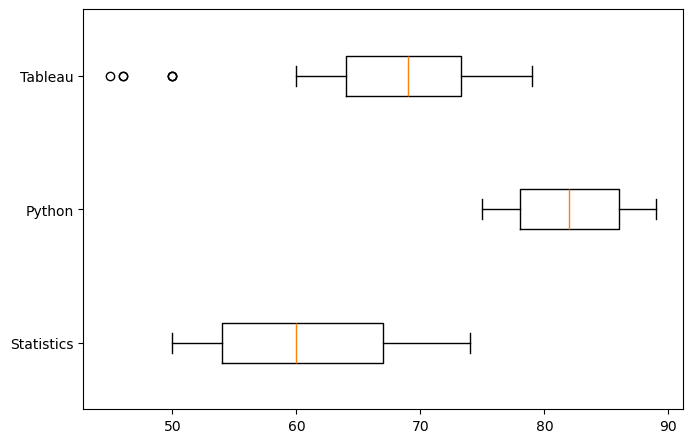

In [17]:
#Task4:
#Visualisating the spread of data
import matplotlib.pyplot as plt

Statistics_scores =df["Statistics"].to_list()
Python_scores = df["Python"].to_list()
Tableau_scores = df["Tableau"].to_list()


#setting the figure size
fig = plt.figure (figsize = (6,4))

#creating the axes
ax = fig.add_axes([0,0,1,1]) #(left,bottam,width,height)

#creating the boxplots for each organization
plt.boxplot([Statistics_scores,Python_scores,Tableau_scores], vert=0)

#set y_axis label
ax.set_yticklabels(["Statistics","Python","Tableau"])

plt.show()

#Interpretation:here this boxplot shows "Tableau is the most skewed subject "

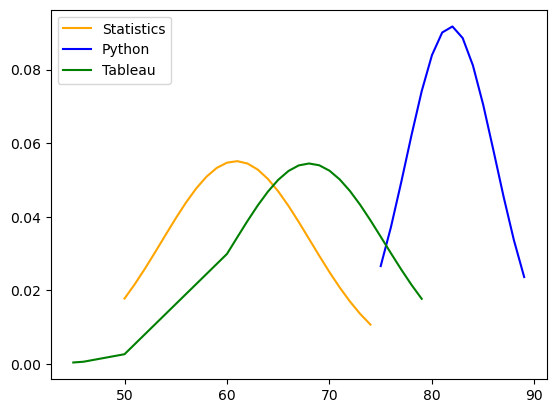

In [8]:
#Task5:
from scipy.stats import norm
#pdf probability distribution function

#sort Data
Statistics_scores = sorted(Statistics_scores)
Python_scores = sorted(Python_scores)
Tableau_scores = sorted(Tableau_scores)

#calculating the Mean and std dev
S_mean = st.mean(Statistics_scores)
S_sd = st.stdev(Statistics_scores)
P_mean = st.mean(Python_scores)
P_sd = st.stdev(Python_scores)
T_mean = st.mean(Tableau_scores)
T_sd = st.stdev(Tableau_scores)

#drawing plots using sorted data  and normalized data
plt.plot(Statistics_scores, norm.pdf(Statistics_scores,S_mean,S_sd),color="orange",label = "Statistics")
plt.plot(Python_scores, norm.pdf(Python_scores,P_mean,P_sd),color="blue",label = "Python")
plt.plot(Tableau_scores, norm.pdf(Tableau_scores,T_mean,T_sd),color="green",label = "Tableau")

#legends
plt.legend()
plt.show()